---
layout: default
title: "Neural Networks - Model Representation"
categories: neuralNetwork
permalink: /ML10/
order: 10
comments: true
---

In [7]:
%pylab --no-import-all inline
from plot_ann import ann
import pandas as pd
from mpl_flow import Flow
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"

Populating the interactive namespace from numpy and matplotlib


# Model Representation of Neural Network
Anatomical neurons are cells that are present in the brain in millions. A neuron has a cell body, a number of input wires, called *dendrites* and an output wire called *axon*.

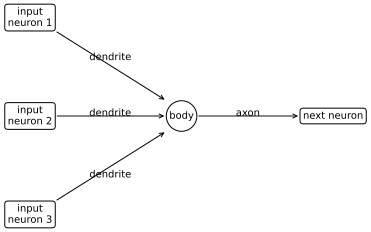

In [8]:
f = Flow()
f.node('i1', label='input\nneuron 1')
f.node('i2', label='input\nneuron 2', travel='s', connect=False)
f.node('i3', label='input\nneuron 3', travel='s', connect=False)
f.node('body', startpoint='i2', bbox=dict(boxstyle='circle'), edge_kwargs={'label': 'dendrite'})
f.node('next neuron', edge_kwargs={'label': 'axon'})
f.edge('i1', 'body', label='dendrite')
f.edge('i3', 'body', label='dendrite');

In a simplistic way a neuron is a computational unit that receive some input via dendrites, does some computation and then outputs something via the axon to other neurons in the brain.

A neuron implemented on the computer has a very simple model that mimics the architecture of an anatomical neuron. We're a going to model a neuron as just a logistic unit. The yellow node represents the *body* of the neuron, which is fed input through its *dendrites*, and produces an output $h_\theta(x)$ that is produced by the neuron body, though its **activation function** and transported forward by the neuron *axon*. Where $h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$

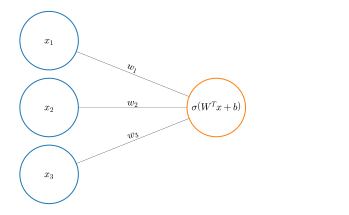

In [9]:
nodelabels=["$x_1$", "$x_2$", "$x_3$", r"$\sigma\left(W^Tx+b\right)$"]
edgelabels=["$w_1$", "$w_2$", "$w_3$"]
colors=['C0', 'C0', 'C0', 'C1']
ax, *_ = ann([3, 1], node_labels=nodelabels, 
             edge_labels=edgelabels, node_colors=True, 
             radius=2.5, height=.6, edge_label_spacing=0)
ax.set_aspect('equal')

A simpler representation is sometimes used to depict a neural network

$$
[x_0x_1x_2x_3]\to[]\to h_\theta(x)
$$

where $x_0$ (sometimes called the bias unit) is usually omitted in favor of another representation:

$$
[x_1x_2x_3]\to[]\to h_\theta(x)
$$

and the parameters, or **weights** ($w$) are accompanied by the **bias** $b$.

Until now we represented single neurons; a neural network is a group of different neurons connected together. The input nodes are grouped in what is called the **input layer** ($x$), which is always the first layer of the neural network. The final layer is called the **output layer**, since it computes the final value of our hypothesis. And all layers in between the input and the output layers are called **hidden layers**. They are called hidden layers because we can't observes the values computed by these nodes.

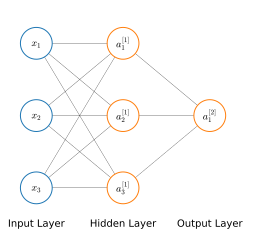

In [10]:
layers = ['Input Layer', 'Hidden Layer', 'Output Layer']
nodelabels = ['$x_1$', '$x_2$', '$x_3$', '$a^{[1]}_1$', '$a^{[1]}_2$', '$a^{[1]}_3$', '$a^{[2]}_1$']
ax, *_ = ann([3, 3, 1], node_labels=nodelabels, node_colors=True, layer_labels=layers, radius=2, width=1.2)
ax.set_aspect('equal')

<i id="fig:simpleann">A simple neural network with one hidden layer</i>

The computational entities in a neural networks are:

* $a_i^{[l]}$  activation neuron/unit $i$ in layer $l$
* $W^{[l]}$ matrix of weights controlling the function mapping from layer $l$ to layer $l+1$ 
* $b^{[l]}$ the bias vectors

And the computation in the network

$$
\left[x_1 x_2 x_3 \right]\to \left[a_1^{[1]}a_2^{[1]}a_3^{[1]} \right]\to a_1^{[2]} \equiv \hat{y}
$$

# Forward propagation

The flow of the computation in the network in <a href="#fig:simpleann">the figure above</a> from input (left) to prediction (right), called forward propagation, is just like that in logistic regression but a lot more times. In fact, each unit in layer $l$ is **densely connected** (namely is connected to all units in layer $l+1$) and we will have to compute a logistic regression for each connection.

So, for example, the computations that we will have to execute from the input layer to the first layer will be:

$$
\begin{align}
& a_1^{[1]} =
g \left(
\left( W_{11}^{[1]}x_1 + b^{[1]}_{11} \right) + 
\left( W_{12}^{[1]}x_2 + b^{[1]}_{12} \right) +
\left( W_{13}^{[1]}x_3 + b^{[1]}_{13} \right)
\right) \\
& a_2^{[1]} = 
g \left(
\left( W_{21}^{[1]}x_1 + b^{[1]}_{21} \right) + 
\left( W_{22}^{[1]}x_2 + b^{[1]}_{22} \right) +
\left( W_{23}^{[1]}x_3 + b^{[1]}_{23} \right)
\right) \\
& a_3^{[1]} = 
g \left(
\left( W_{31}^{[1]}x_1 + b^{[1]}_{31} \right) + 
\left( W_{32}^{[1]}x_2 + b^{[1]}_{32} \right) +
\left( W_{33}^{[1]}x_3 + b^{[1]}_{33} \right)
\right) \\
\end{align}
\label{eq:neuralnet} \tag{1}
$$

That is to say that we compute our hidden units in the first layer as a $3\times 3$ matrix of parameters $W^{[l]}_{ij}$, weighting the connection from unit $j$ in layer $l-1$ to unit $i$ in layer $l$.



In [11]:
w = pd.DataFrame(index=['$a^{[1]}_1$', '$a^{[1]}_2$', '$a^{[1]}_3$'], columns=['$x_1$', '$x_2$', '$x_3$'])
for i in range(0, 3):
    for j in range(0, 3):
        w.iloc[i, j] = '$W^{{[1]}}_{{{}{}}}$'.format(i+1, j+1)
w

,$x_1$,$x_2$,$x_3$
$a^{[1]}_1$,$W^{[1]}_{11}$,$W^{[1]}_{12}$,$W^{[1]}_{13}$
$a^{[1]}_2$,$W^{[1]}_{21}$,$W^{[1]}_{22}$,$W^{[1]}_{23}$
$a^{[1]}_3$,$W^{[1]}_{31}$,$W^{[1]}_{32}$,$W^{[1]}_{33}$


in other words $W^{[1]} \in \mathbb{R} ^{3\times 3}$. In general if a network has $s_l$ units in layer $l$, $s_{l+1}$ units in layer $l+1$, then $W^{[l]}$ will be of dimension $s_{l+1} \times s_l$

The computations from the first to the second and final (output) layer:

$$
\hat{y}= a_1^{[2]} =  
\left(
\left( W_{11}^{[2]}a_1^{[1]} +b^{[2]}_{11} \right) + 
\left( W_{12}^{[2]}a_2^{[1]} +b^{[2]}_{12} \right)+ 
\left( W_{13}^{[2]}a_3^{[1]} +b^{[2]}_{13} \right)
\right)
\label{eq:neuralnet_h} \tag{2}
$$



This process is called **forward propagation** and produces the output of the neural network form the provided input. 

## Vectorization

### First step of vectorization
Let's see vectorization for $\eqref{eq:neuralnet}$: this process can be then applied to any other layer. In  $\eqref{eq:neuralnet}$ we have the equations $\eqref{eq:l1unit1vect}$ are the operations required to calculate $a^{[1]}_1$ from input $x_1, x_2, x_3$ (<a href="#fig:annfirststeps">figure below</a>, panel A).

$$
\begin{align}
&z^{[1]}_1=w^{[1]T}_1x+b_1^{[1]} \\
&a^{[1]}_1=\sigma(z^{[1]}_1)
\end{align}
\label{eq:l1unit1vect} \tag{3}
$$



Similarly, $\eqref{eq:l1unit2vect}$ are the operations required to calculate $a^{[1]}_2$ from input $x_1, x_2, x_3$ (<a href="#fig:annfirststeps">figure below</a>, panel B)

$$
\begin{align}
&z^{[1]}_2=w^{[1]T}_2x+b_2^{[1]} \\
&a^{[1]}_2=\sigma(z^{[1]}_2)
\end{align}
\label{eq:l1unit2vect} \tag{5}
$$

Finally, $\eqref{eq:l1unit3vect}$  are the operations required to calculate $a^{[1]}_3$ from input $x_1, x_2, x_3$ (<a href="#fig:annfirststeps">figure below</a>, panel C)

$$
\begin{align}
&z^{[1]}_3=w^{[1]T}_3x+b_2^{[1]} \\
&a^{[1]}_3=\sigma(z_3^{[1]})
\end{align}
\label{eq:l1unit3vect} \tag{6}
$$

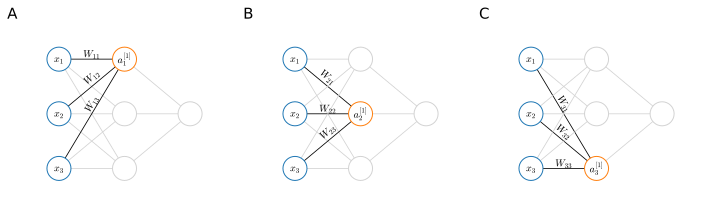

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax1, ax2, ax3 = axes

nodelabels = ['$x_1$', '$x_2$', '$x_3$', '$a^{[1]}_1$']
nodecolors = ['C0'] * 3 + ['C1'] + ['lightgrey'] * 4
edgecolors = ['k', 'lightgrey', 'lightgrey', 'k', 'lightgrey', 'lightgrey', 'k'] + ['lightgrey']*5
edgelabels = ['$W_{11}$', '', '', '$W_{12}$', '', '', '$W_{13}$']
ann([3, 3, 1], node_labels=nodelabels, node_colors=nodecolors,
             edge_colors=edgecolors, radius=2, width=1.2, edge_lw=.8, 
             edge_labels=edgelabels, edge_label_spacing=0, ax=ax1)

nodelabels = ['$x_1$', '$x_2$', '$x_3$', '', '$a^{[1]}_2$']
nodecolors = ['C0'] * 3 + ['lightgrey'] + ['C1'] + ['lightgrey'] * 2
edgecolors = ['lightgrey', 'k', 'lightgrey', 'lightgrey', 'k', 'lightgrey', 'lightgrey', 'k'] + ['lightgrey']*5
edgelabels = ['', '$W_{21}$', '', '', '$W_{22}$', '', '', '$W_{23}$']
ann([3, 3, 1], node_labels=nodelabels, node_colors=nodecolors,
             edge_colors=edgecolors, radius=2, width=1.2, edge_lw=.8, 
             edge_labels=edgelabels, edge_label_spacing=0, ax=ax2)

nodelabels = ['$x_1$', '$x_2$', '$x_3$', '', '', '$a^{[1]}_3$']
nodecolors = ['C0'] * 3 + ['lightgrey'] * 2 + ['C1'] + ['lightgrey']
edgecolors = ['lightgrey',  'lightgrey', 'k', 'lightgrey',  'lightgrey', 'k', 'lightgrey', 'lightgrey', 'k'] + ['lightgrey']*5
edgelabels = ['', '', '$W_{31}$',  '', '', '$W_{32}$',  '', '', '$W_{33}$']
ann([3, 3, 1], node_labels=nodelabels, node_colors=nodecolors,
             edge_colors=edgecolors, radius=2, width=1.2, edge_lw=.8, 
             edge_labels=edgelabels, edge_label_spacing=0, ax=ax3)

for ax, l in zip(axes, ['A', 'B', 'C']):
    ax.text(-0.1, 1.15, l, transform=ax.transAxes,
      fontsize=15, va='top', ha='right')
    ax.set_aspect('equal')

<i id="fig:annfirststeps">First three steps of forward propagation to calculate the hidden units of the first layer from the input layer.</i>

### Second step of vectorization
Given the set of equation that describe the activtion of the first layer from the input layer, let's see how to calculate $z^{[1]}$ as a vector:

$$
\begin{align}
&z_1^{[1]} = w^{[1]T}_1 x + b_1^{[1]} & a_1^{[1]} = \sigma \left(z_1^{[1]}\right) \\
&z_2^{[1]} = w^{[1]T}_2 x + b_2^{[1]} & a_2^{[1]} = \sigma \left(z_2^{[1]}\right) \\
&z_3^{[1]} = w^{[1]T}_3 x + b_3^{[1]} & a_3^{[1]} = \sigma \left(z_3^{[1]}\right)
\end{align}
$$

Let's first take the vectors $w^{[1]T}_i$ and stack them into a matrix $W^{[1]}$. 

$w^{[1]}_i$ are column vectors, so their transpose are row vectors that are stacked vertically. 

$$
z^{[1]}=
\underbrace{
\begin{bmatrix}
\rule[.5ex]{2.5ex}{0.5pt} & w^{[1]T}_1 &\rule[.5ex]{2.5ex}{0.5pt}\\
\rule[.5ex]{2.5ex}{0.5pt} & w^{[1]T}_2 & \rule[.5ex]{2.5ex}{0.5pt}\\
\rule[.5ex]{2.5ex}{0.5pt} & w^{[1]T}_3 & \rule[.5ex]{2.5ex}{0.5pt}\\
\end{bmatrix}}_{s_j \times n}
\underbrace{
\begin{bmatrix}
x_1 \\ x_2 \\ x_3
\end{bmatrix}}_{n \times 1}+
\underbrace{
\begin{bmatrix}
b_1^{[1]} \\ b_2^{[1]} \\ b_3^{[1]}
\end{bmatrix}}_{s_j \times 1}
=\underbrace{\begin{bmatrix}
z_1^{[1]} \\ z_2^{[1]} \\ z_3^{[1]}
\end{bmatrix}}_{s_j \times 1}
$$

And now we can calculate $a^{[1]}$

$$
a^{[1]}=\sigma \underbrace{ \left( \begin{bmatrix}
z_1^{[1]} \\ z_2^{[1]} \\ z_3^{[1]}
\end{bmatrix} \right) }_{s_j \times 1}
$$

So, summarizing what we have written above and extending it to the second layer we have

$$
\begin{aligned}
&z^{[1]}= W^{[1]}x + b^{[1]} \\
&a^{[1]} = \sigma(z^{[1]})\\
&z^{[2]}= W^{[1]}a^{[1]} + b^{[2]}\\
&a^{[2]} = \sigma(z^{[2]})\\
\end{aligned}
\label{eq:vectanneqs} \tag{7}
$$

or more generally

$$
\begin{align}
&z^{[j]}=W^{[j]}a^{[j-1]} + b^{[j]} \\
&a^{[j]} = \sigma \left(z^{[j]}\right)
\end{align}
$$

### Third step of vetorization across multiple examples
The process in $\eqref{eq:vectanneqs}$ must be repeated for each training example $x^{(m)}$ and will produce $m$ outputs $a^{(m)[2]} = \hat{y}^{(m)}$

In a non-vectorized implementation you would have something along the lines of:

```python
for i in len(examples):
    z1[i] = w1 @ x[i] + b[i]
    a1[i] = sigmoid(z1[i])
    z2[i] = w2 @ x([i] + b[i]
    a2[i] = sigmoid(z1[i])
```

Given our vector of training examples:

$$
X=
\begin{bmatrix}
& \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} & & \rule[-1ex]{0.5pt}{2.5ex}\\
&x^{(1)}&x^{(2)}&\dots&x^{(m)}\\
& \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} & & \rule[-1ex]{0.5pt}{2.5ex}\\
\end{bmatrix} \in \mathbb{R}^{n\times m}
$$

So this means that our vectorized implementation becomes

$$
\begin{aligned}
&Z^{[1]}= W^{[1]}X + b^{[1]} \\
&A^{[1]} = \sigma(z^{[1]})\\
&Z^{[2]}= W^{[2]}A^{[1]} + b^{[2]}\\
&A^{[2]} = \sigma(Z^{[2]})\\
\end{aligned}
$$

with $Z^{[1]}$ and $A^{[1]}$ represent the $z$-values and $a$-values of the first layer of the neural network:

$$
Z^{[1]}=
\begin{bmatrix}
& \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} & & \rule[-1ex]{0.5pt}{2.5ex}\\
&z^{[1](1)}&z^{[1](2)}&\dots&z^{[1](m)}\\
& \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} & & \rule[-1ex]{0.5pt}{2.5ex}\\
\end{bmatrix} \in \mathbb{R}^{n^{[1]} \times m} 
\qquad 
A^{[1]}=
\begin{bmatrix}
& \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} & & \rule[-1ex]{0.5pt}{2.5ex}\\
&a^{[1](1)}&a^{[1](2)}&\dots&a^{[1](m)}\\
& \rule[-1ex]{0.5pt}{2.5ex} & \rule[-1ex]{0.5pt}{2.5ex} & & \rule[-1ex]{0.5pt}{2.5ex}\\
\end{bmatrix} \in \mathbb{R}^{n^{[1]} \times m}
$$

where $m$ is the number of training examples and $n^{[1]}$ is the number of nodes (hidden units) in the first layer of the neural networks.